# Домашнее задание (10 баллов) Выполнял: Зернов Данил


(2 балла)
1. закончить реализацию `ClassificationDecisionTree` в decision_tree
    1. реализовать feature_importance_ (для этого метода теста нет, подойдет реализацию любого варианта, базовый способ - рекурсивно суммировать по всем `self.feature_id` `self.q_value_max` и вывести суммы. 
    2. проверить корректность predict 
2. реализовать `BaseSampler`, `ObjectSampler` и `FeatureSampler`. `BaseSampler` - базовый класс, у которого должен быть реализован метода `sample_indices` - вернуть индексы сэмплов. `ObjectSampler` сэплирует объекты, `FeatureSampler` - признаки.
3. реализовать `RandomForestClassifier` в random_forest (predict/predict_proba).

Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Пример запуска тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests` 

Или через `pytest`
- `python -m pytest sem_dt_rf/decision_tree/tests/test_criterio.py`

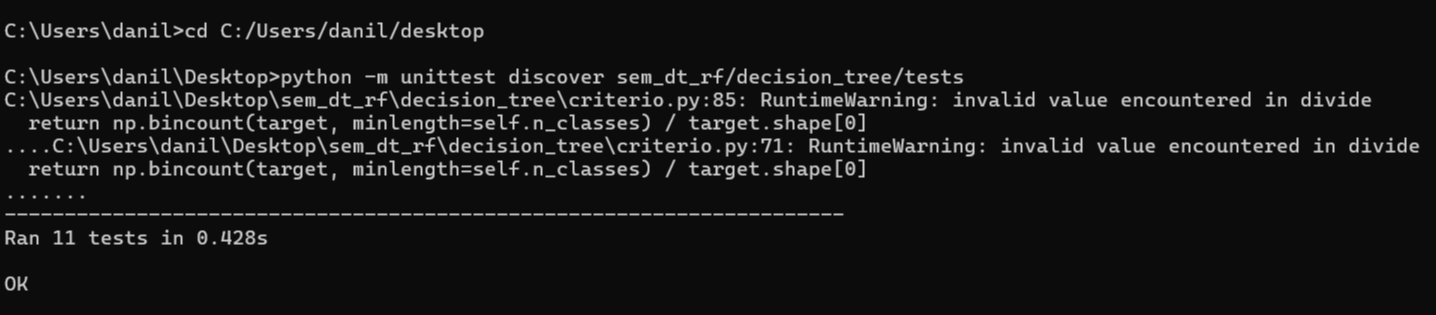

In [7]:
from IPython.display import Image
Image('decision_tree.png')

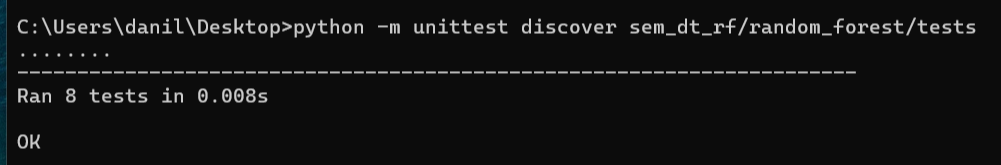

In [8]:
Image('random_forest.png')

(1 балл) Для регрессионного дерева необходимо использовать такой критерий:
$$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$

Докажите, что минимум H(R) достигается при $c$:

$$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

Доказательство:
В формуле, $H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$, чтобы доказать что минимум, действительно при $ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$ необходимо минимизировать сумму квадратов. Распишем её более подробно: $$\sum_{(x_i, y_i) \in R} (y_i - c)^2 = \sum_{(x_i, y_i) \in R} (y_{i}^{2} - 2y_{i}c +c^2) = \sum_{(x_i, y_i) \in R}y_{i}^2 - 2c\sum_{(x_i, y_i) \in R}y_{i} + \sum_{(x_i, y_i) \in R}c^2$$, заметим, что последняя сумма не зависит от индексов суммирования следовательно $\sum_{(x_i, y_i) \in R}c^2 = |R|c^2$, продифференцируем итоговое выражение по c, получим: $$ -2\sum_{(x_i, y_i) \in R}y_{i} + 2|R|c = 0$$, сокращаем на два и выражаем c, получаем необходимое выражение для константы на которой достигается минимум: $$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$. Это именно минимум так как видно что при раскрытии квадрата мы получаем пораболу ветвями вверх, так как коэффициент при квадратичном члене положительный.


(3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2, в коде есть заглушка `MSECriterion`. В качестве `predict` необходимо использовать среднее значение ответов по всем объектам в листе. В коде нет готовой заглушки, реализуйте по аналогии с `class ClassificationDecisionTree(DecisionTree):`.

Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике `predict` алгоритма и значение признака. Что меняется при изменении параметра глубины? Сделайте выводы.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append(r'C:\Users\danil\Desktop')

from decision_tree import RegressionDecisionTree
%load_ext autoreload
%autoreload 2

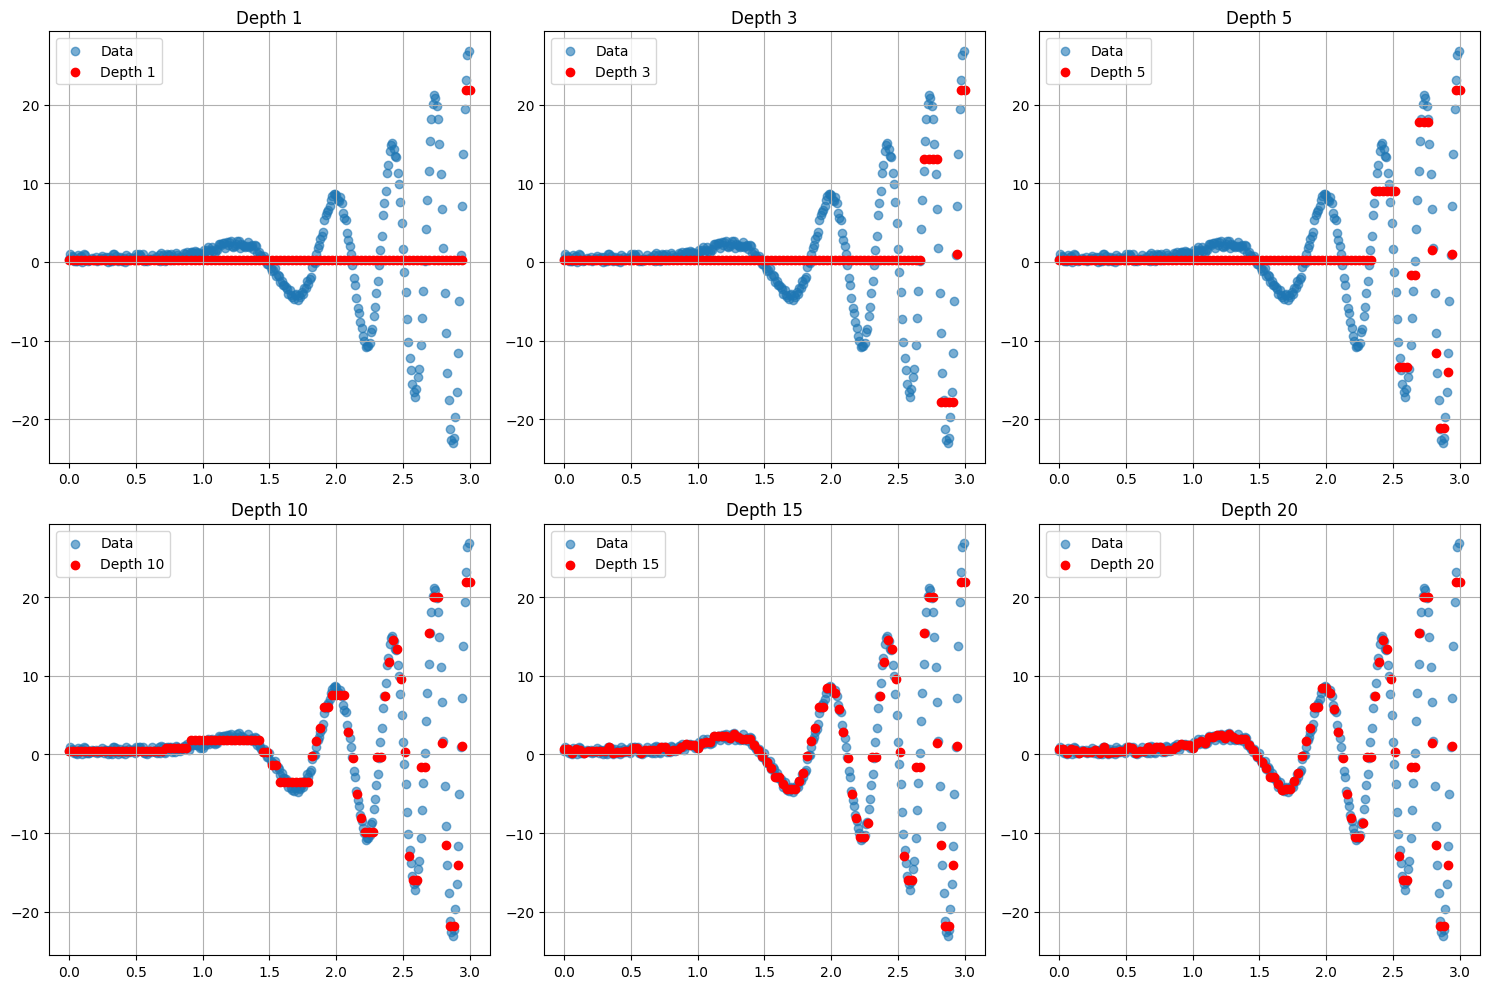

In [2]:
# generate example
np.random.seed(42)
x_shape = 300
x = np.arange(x_shape) / 100
y = x**3 * np.sin(x**3) + np.random.random(x_shape)

x = x.reshape(-1, 1) #пришлось переделать чтобы корректно работало
depth_values = [1, 3, 5, 10, 15, 20]
X_test = np.linspace(0, 3, 100).reshape(-1, 1)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, depth in enumerate(depth_values):
    tree = RegressionDecisionTree(max_depth=depth)
    tree.fit(x, y)
    y_pred = tree.predict(X_test)
    ax = axes[i // 3, i % 3]
    x_plot = x.reshape(1, -1)[0]
    ax.scatter(x_plot, y, label='Data', alpha=0.6)
    ax.scatter(X_test, y_pred, color='red', label=f'Depth {depth}')
    ax.set_title(f'Depth {depth}')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

Как и ожидалось при увеличении глубины дерева улучшается предсказательная способность дерева на трейне, что в дальнейшем приводит к возможному переобучению на тесте, а еще как и предполагалось в теории дерево строит решение как кусочно-постоянную функцию.

(4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [1]:
import sys
sys.path.append(r'C:\Users\danil\Desktop')

In [2]:
from sem_dt_rf.random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [21]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
import time
import warnings
warnings.filterwarnings("ignore")

In [6]:
import gzip

data_path = 'covtype.data.gz'
with gzip.open(data_path, 'rb') as f:
    cov_data = np.genfromtxt(f, delimiter=',')
#не получалось импортировать пришлось вручную скачать датасет
X = cov_data[:, :-1]
y = cov_data[:, -1]
y -= 1

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [8]:
def comparasion_model(model,x_train, y_train, x_test, y_test):
    start_fit_time = time.time()
    model.fit(x_train, y_train)
    stop_fit_time = time.time()
    total_fit_time = stop_fit_time - start_fit_time
    start_predict_time = time.time()
    y_pred = model.predict(x_test)
    stop_predict_time = time.time()
    total_predict_time = stop_predict_time - start_predict_time
    score = balanced_accuracy_score(y_test, y_pred)
    return score, total_fit_time, total_predict_time

In [9]:
Myrf = MyRandomForestClassifier(n_estimators=100, 
                                criterion='gini', 
                                max_features="sqrt", 
                                max_depth=None,
                                max_objects_samples=1.0,
                                max_features_samples=1.0,  
                                min_samples_leaf=1, 
                                random_state=42)

In [10]:
classic_rf = RandomForestClassifier(n_estimators=100, 
                                    criterion='gini', 
                                    max_features="sqrt", 
                                    max_depth=None,
                                    min_samples_leaf=1, 
                                    random_state=42)

In [37]:
lgb_rf = lgb.LGBMClassifier(n_estimators=100, 
                            boosting_type='rf', 
                            colsample_bytree=0.7, 
                            subsample=0.7,
                            max_depth=-1,
                            force_col_wise=True,
                            random_state=42,
                            n_jobs=1,
                            num_leaves=1022,
                            verbose=-1)

In [38]:
xgb_rf = xgb.XGBClassifier(n_estimators=100, 
                            max_depth=0,
                            colsample_bytree=0.7, 
                            subsample=0.7,
                            objective='multi:softmax', 
                            num_class=len(np.unique(y)), 
                            n_jobs=1,
                            random_state=42)

In [13]:
my_score, my_fit_time, my_predict_time = comparasion_model(Myrf,x_train, y_train, x_test, y_test)

In [14]:
classic_score, classic_fit_time, classic_predict_time = comparasion_model(classic_rf,x_train, y_train, x_test, y_test)

In [39]:
lgb_score, lgb_fit_time, lgb_predict_time = comparasion_model(lgb_rf, x_train, y_train, x_test, y_test)

In [40]:
xgb_score, xgb_fit_time, xgb_predict_time = comparasion_model(xgb_rf, x_train, y_train, x_test, y_test)

In [41]:
results = f"""
1. Собственная реализация RandomForest:
   - Balanced Accuracy: {my_score:.6f}
   - Время обучения: {my_fit_time:.2f} сек
   - Время предсказания: {my_predict_time:.2f} сек

2. RandomForest:
   - Balanced Accuracy: {classic_score:.6f}
   - Время обучения: {classic_fit_time:.2f} сек
   - Время предсказания: {classic_predict_time:.2f} сек

3. LightGBM:
   - Balanced Accuracy: {lgb_score:.6f}
   - Время обучения: {lgb_fit_time:.2f} сек
   - Время предсказания: {lgb_predict_time:.2f} сек

4. XGBoost:
   - Balanced Accuracy: {xgb_score:.6f}
   - Время обучения: {xgb_fit_time:.2f} сек
   - Время предсказания: {xgb_predict_time:.2f} сек
"""
print(results)


1. Собственная реализация RandomForest:
   - Balanced Accuracy: 0.832824
   - Время обучения: 74.21 сек
   - Время предсказания: 64.64 сек

2. RandomForest:
   - Balanced Accuracy: 0.831489
   - Время обучения: 46.84 сек
   - Время предсказания: 22.70 сек

3. LightGBM:
   - Balanced Accuracy: 0.886040
   - Время обучения: 27.65 сек
   - Время предсказания: 173.49 сек

4. XGBoost:
   - Balanced Accuracy: 0.875930
   - Время обучения: 58.98 сек
   - Время предсказания: 71.56 сек



Как видно собственная реализация по качеству сравнива с реализацией в sklearn, хотя и уступает по времени, бустинги же по качеству работают чуть лучше, но дольше так как у них должна быть другая логика работы и они не заточены под параметры рандом фореста